# Bay Wheels Bike Renting Analysis
## by Sahand Niasti

## Investigation Overview

> The main goal in this Dataset is to investigate what features play an important role in analyzing bike renting in Bay Wheels. to solve this probelm, we firstly generate new features out of the raw data, then analyzed each of them seperately to broaden our insoght about the dataset. after that, in second step, the relationships between features have been investigated to let us know the bike riders patterns of behavior. In the end, these features were scrutinized  multivariably to gain a better view.

## Dataset Overview

> goforbike site have provided us the bike rental data for each month since 2017. Here, i decided to make a comparison between the first three month of 2019 and 2020 and see whether any difference in patterns of behavior in these two similar time period over a year. there were around 600,000 records in 2019 and 900,000 records in 2020.

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import zipfile
import geopy.distance
from sklearn.cluster import KMeans
%matplotlib inline
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_2019 = pd.read_csv('2019-clean-tripdata.csv')
df_2020 = pd.read_csv('2020-clean-tripdata.csv')

## bike renting records sample in 2019

In [20]:
df_2019.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,month,monthday,weekday,started_hour,ended_hour,label,distance_in_m
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,229,Foothill Blvd at 42nd Ave,196,Grand Ave at Perkins St,4861,Subscriber,January,31,Thursday,17,16,San Francisco,5307.08
1,65900,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,4,Cyril Magnin St at Ellis St,134,Valencia St at 24th St,5506,Subscriber,January,31,Thursday,20,15,San José,3853.75
2,62633,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,245,Downtown Berkeley BART,157,65th St at Hollis St,2717,Customer,January,31,Thursday,18,11,San Francisco,3286.34
3,44680,2019-01-31 19:46:09.719,2019-02-01 08:10:50.318,85,Church St at Duboce Ave,53,Grove St at Divisadero,4557,Customer,January,31,Thursday,19,8,San José,1000.23
4,60709,2019-01-31 14:19:01.541,2019-02-01 07:10:51.065,16,Steuart St at Market St,28,The Embarcadero at Bryant St,2100,Customer,January,31,Thursday,14,7,San José,952.99
5,6733,2019-01-31 22:35:50.813,2019-02-01 00:28:04.512,245,Downtown Berkeley BART,266,Parker St at Fulton St,3532,Subscriber,January,31,Thursday,22,0,San Francisco,909.78
6,1188,2019-01-31 23:54:38.901,2019-02-01 00:14:27.900,34,Father Alfred E Boeddeker Park,146,30th St at San Jose Ave,5114,Subscriber,January,31,Thursday,23,0,San José,4721.87
7,1254,2019-01-31 23:48:50.092,2019-02-01 00:09:44.497,318,San Carlos St at Market St,314,Santa Clara St at Almaden Blvd,3967,Subscriber,January,31,Thursday,23,0,East Bay,639.42
8,3153,2019-01-31 23:17:05.462,2019-02-01 00:09:39.457,29,O'Farrell St at Divisadero St,70,Central Ave at Fell St,4813,Subscriber,January,31,Thursday,23,0,San José,1095.93
9,323,2019-01-31 23:59:47.568,2019-02-01 00:05:11.177,223,16th St Mission BART Station 2,129,Harrison St at 20th St,1976,Subscriber,January,31,Thursday,23,0,San José,933.56


## bike renting records sample in 2020

In [21]:
df_2020.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,rental_access_method,month,monthday,weekday,started_hour,ended_hour,label,distance_in_m
0,83118,2020-01-31 15:23:47.733,2020-02-01 14:29:06.263,400.0,Buchanan St at North Point St,400.0,Buchanan St at North Point St,13052,Customer,NaN,January,31,Friday,15,14,East Bay,0.00
1,68239,2020-01-31 15:40:31.616,2020-02-01 10:37:51.000,99.0,Folsom St at 15th St,99.0,Folsom St at 15th St,12235,Subscriber,NaN,January,31,Friday,15,10,East Bay,0.00
2,55407,2020-01-31 17:48:16.635,2020-02-01 09:11:44.317,197.0,El Embarcadero at Grand Ave,197.0,El Embarcadero at Grand Ave,12822,Customer,NaN,January,31,Friday,17,9,San Francisco,0.00
3,54929,2020-01-31 17:53:03.413,2020-02-01 09:08:32.634,197.0,El Embarcadero at Grand Ave,197.0,El Embarcadero at Grand Ave,11705,Customer,NaN,January,31,Friday,17,9,San Francisco,0.00
4,55700,2020-01-31 17:12:33.460,2020-02-01 08:40:53.646,12.0,Pier 1/2 at The Embarcadero,371.0,Lombard St at Columbus Ave,3673,Customer,NaN,January,31,Friday,17,8,East Bay,1815.45
5,11333,2020-01-31 22:48:22.639,2020-02-01 01:57:15.716,60.0,8th St at Ringold St,75.0,Market St at Franklin St,12137,Customer,NaN,January,31,Friday,22,1,East Bay,1041.81
6,11341,2020-01-31 22:48:12.989,2020-02-01 01:57:14.165,60.0,8th St at Ringold St,75.0,Market St at Franklin St,12321,Customer,NaN,January,31,Friday,22,1,East Bay,1041.81
7,4038,2020-01-31 23:32:03.907,2020-02-01 00:39:22.021,450.0,Funston Ave at Irving St,450.0,Funston Ave at Irving St,1589,Customer,NaN,January,31,Friday,23,0,East Bay,0.00
8,4059,2020-01-31 23:31:01.161,2020-02-01 00:38:40.857,450.0,Funston Ave at Irving St,450.0,Funston Ave at Irving St,12884,Customer,NaN,January,31,Friday,23,0,East Bay,0.00
9,1980,2020-01-31 23:49:09.230,2020-02-01 00:22:09.754,238.0,MLK Jr Way at University Ave,198.0,Snow Park,10464,Customer,NaN,January,31,Friday,23,0,San Francisco,7133.16


In [3]:
#dropping unnecessary columns
df_2019.drop(['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude'], axis = 1, inplace = True)
df_2020.drop(['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude'], axis = 1, inplace = True)


## Which user type is more popular in each year?

it seems that over the year 2019, the total number of sunscribers did not change at all, but the number of normal customers has risen considerbly, reaching from less than 100,000 riders in 2019 to around 360,000 riders in 2020.

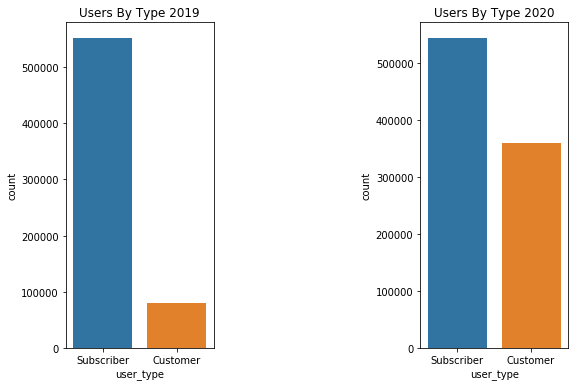

In [5]:
plt.figure(figsize=(9, 6))

plt.subplot(1,3,1)
sns.countplot(data= df_2019, x= 'user_type' )
plt.title("Users By Type 2019")


plt.subplot(1,3,3)
sns.countplot(data= df_2020, x= 'user_type', order = df_2020.user_type.value_counts().index );
plt.title("Users By Type 2020");

## In which months, users have rented more bikes?

- it is clear that in the first two months of the winter, people have rented bicycles more in 2020 than 2019.this figure has almost been doubled in February 2020, with around 420,000 rented bike, while in on the same month in 2019, less than 200,000 ride was happened.
- popularity of these bikes fell in march, from around 250k in 2019 to less than 200k in 2020. the reason might be related to the Corona Virus pandemic.

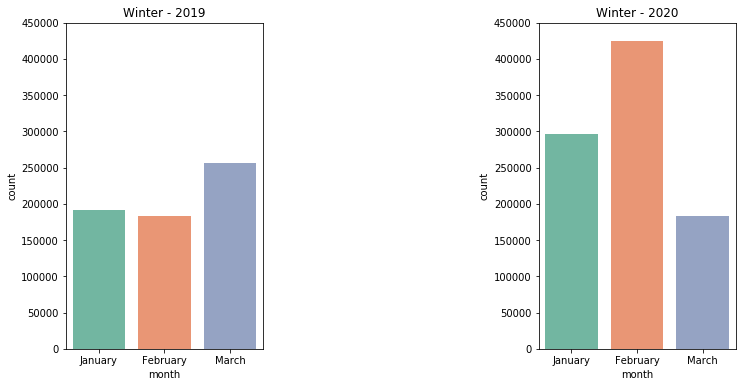

In [6]:
plt.figure(figsize=(12, 6))

plt.subplot(1,3,1)
sns.countplot(data= df_2019, x= 'month',palette="Set2")
plt.title("Winter - 2019")
plt.ylim(0,450000)

plt.subplot(1,3,3)
sns.countplot(data= df_2020, x= 'month' ,palette="Set2")
plt.ylim(0,450000)
plt.title("Winter - 2020");

## Which locations show more enthusiasm to rent bikes in 2019 and 2020?
- It's so interensting how the pattern of bike renting has changed just during a year. while residents of San Jose rented the most bicycle during the winter in 2019 (around 400k), this figure has fallen by more than 300k. something must have happened there !!
- Almost nobody used Lyft bike renting in East Bay, but suddenly after a year, this location led this company make a fortune by renting around 800k bike just over a 3 month period.
- San Francico residents have rented less bike in 2020 in comparison to the previous year.


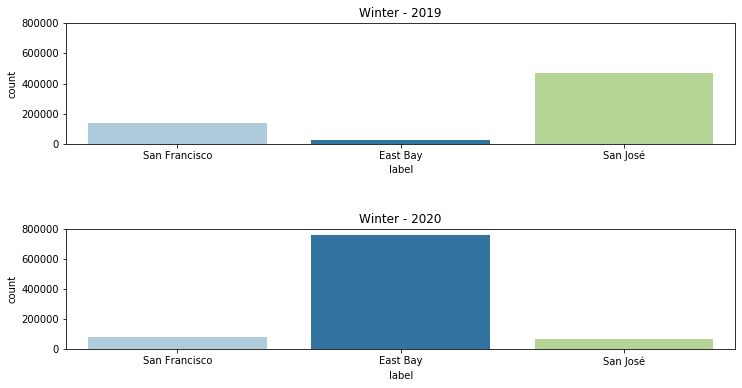

In [7]:

plt.figure(figsize=(12, 6))

plt.subplot(2,1,1)
sns.countplot(data= df_2019, x= 'label',palette="Paired",order = ["San Francisco","East Bay","San José"])
plt.title("Winter - 2019")
plt.ylim(0,800000)

plt.subplot(2,1,2)
sns.countplot(data= df_2020, x= 'label' ,palette="Paired", order =["San Francisco","East Bay","San José"] )

plt.ylim(0,800000)
plt.title("Winter - 2020");
plt.subplots_adjust(hspace=0.7);

## What is the distribution of trip time for rented bikes?
This graph is limited to 6000 seconds to exclude the 'outliers'. The main takeaway here is that the most trips have a duration between 250 and 550 seconds.

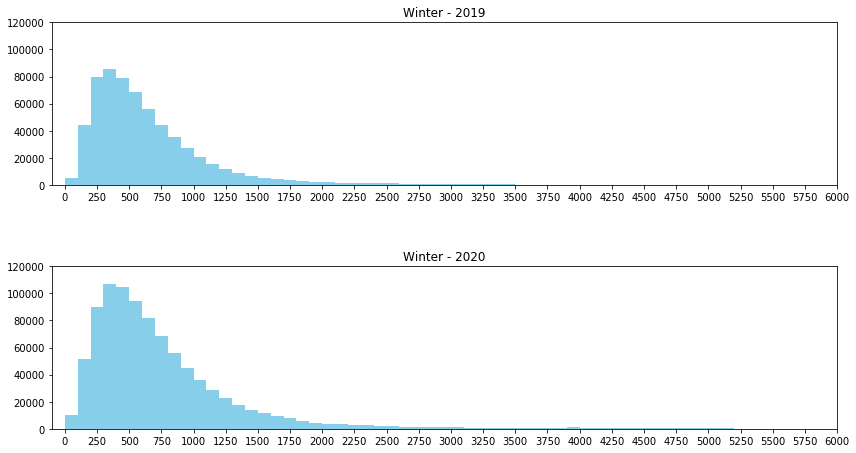

In [8]:
plt.figure(figsize=(12, 6))
#maybe a customer forgot to log off
plt.subplot(2,1,1)
bin_size = 100
bins = np.arange(0,df_2019.duration_sec.max()+bin_size,bin_size)
plt.hist(df_2019.duration_sec, bins = bins, color= "skyblue");
plt.xticks(ticks = [x for x in range(0,7000,250)])
plt.xlim(-100,6000)
plt.ylim(0,120000)
plt.tight_layout()
plt.title("Winter - 2019")


plt.subplot(2,1,2)
bins = np.arange(0,df_2020.duration_sec.max()+bin_size,bin_size)
plt.hist(df_2020.duration_sec, bins = bins, color= "skyblue");
plt.xticks(ticks = [x for x in range(0,7000,250)])
plt.xlim(-100,6000)
plt.ylim(0,120000)
plt.title("Winter - 2020")
plt.subplots_adjust(hspace=0.5);

## What is the popularity of renting bike for each user in each month?
- In 2019, no matter which month you rent a bike, Subscribers were in majority. the number of normal customers were almost a third of subscribers in this year. However, people welcomed this system more in march.
- In 2020, situation differed. February was the most popular month among both subscribers and the total number of customers increased
- what is interesting about this chart is that in January and February 2020, people without subscription (customers) have rented more bike than subsvribers in March. the only time when the number of customers were more than subscribers.
- March 2020 was the time when the number of subscribers and customers were closest.

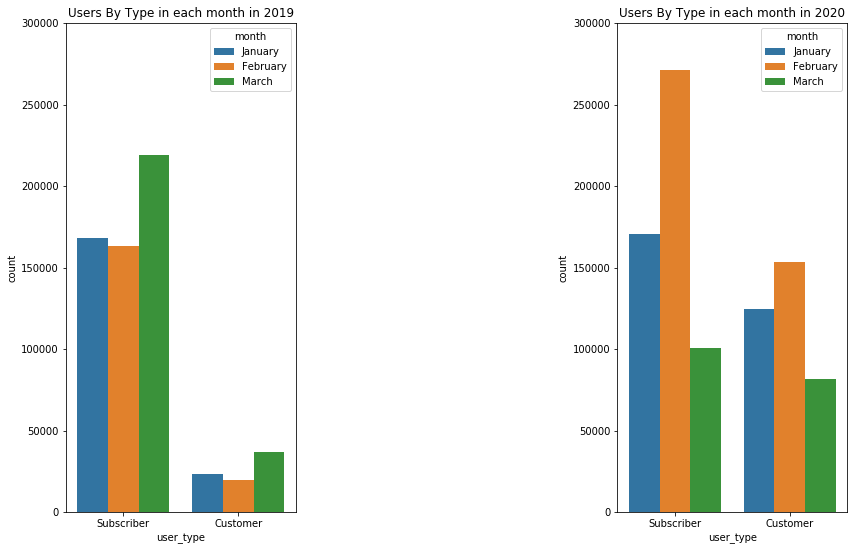

In [9]:
plt.figure(figsize=(14, 9))

plt.subplot(1,3,1)
sns.countplot(data= df_2019, x= 'user_type' , hue = 'month')
plt.title("Users By Type in each month in 2019")
plt.ylim(0,300000)


plt.subplot(1,3,3)
sns.countplot(data= df_2020, x= 'user_type', order = df_2020.user_type.value_counts().index , hue = 'month');
plt.title("Users By Type in each month in 2020")
plt.ylim(0,300000);

## What is the average distance taken based on each user type?
It can be seen that the main difference between two bar chart is that the total number of customers have increased throughout the week in 2020.
More subscribers can be seen on the weekends than the same time in 2019

''

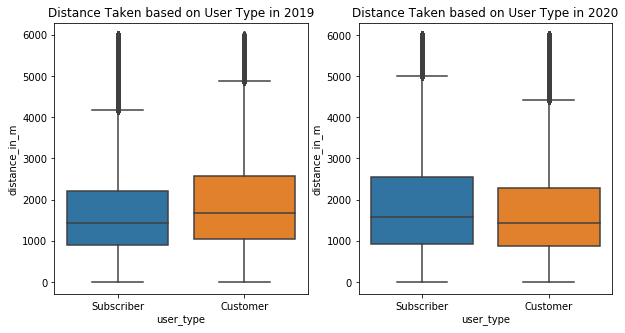

In [10]:

# Setting figure size
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
# Plotting boxplot
sns.boxplot(data=df_2019[df_2019['distance_in_m']<6000], x='user_type', y='distance_in_m')
plt.title("Distance Taken based on User Type in 2019")

plt.subplot(1,2,2)
# Plotting boxplot
sns.boxplot(data=df_2020[df_2020['distance_in_m']<6000], x='user_type', y='distance_in_m', order = ['Subscriber', 'Customer'])
plt.title("Distance Taken based on User Type in 2020")
;

## What is the average duration time riders have rented a bike on each weekday?
We have seen that people tend to rent more bike on working days than weekends. However, what is interesting about this figure is that average duration time each bike was rented was higher in weekends than working days. It is possible that bikes rented from Monday to Thursday are for commuting to work or maybe other goal oriented tasks, but during the weekends, there are other goals. Now let's look at average distance taken on each week day.

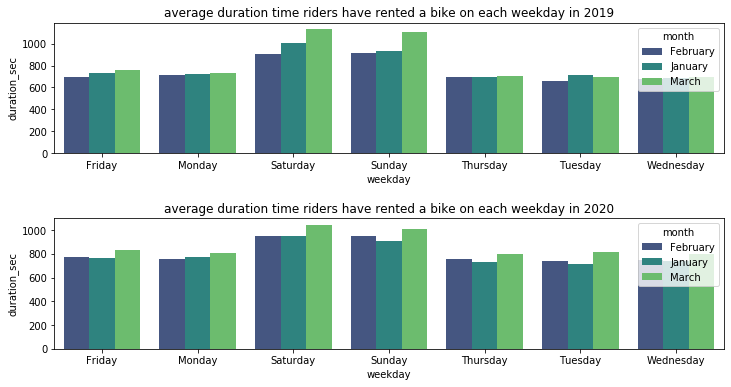

In [14]:
plt.figure(figsize=(12, 6))
plt.subplot(2,1,1)

sns.barplot(x = "weekday", y = "duration_sec", data = df_2019.groupby(["weekday", "month"], as_index = False).mean(), palette = "viridis", hue = "month")
plt.title('average duration time riders have rented a bike on each weekday in 2019')
plt.subplot(2,1,2)

sns.barplot(x = "weekday", y = "duration_sec", data = df_2020.groupby(["weekday", "month"], as_index = False).mean(), palette = "viridis", hue = "month")
plt.title('average duration time riders have rented a bike on each weekday in 2020')
plt.subplots_adjust(hspace=0.5);

## What is the average duration  time for rented bikes on each hour based on the winter three month?
during some odd times,such as 2 am or 2 pm, people have rented a longer time on average than any other time. it is somehow weird and require in depth analysis.

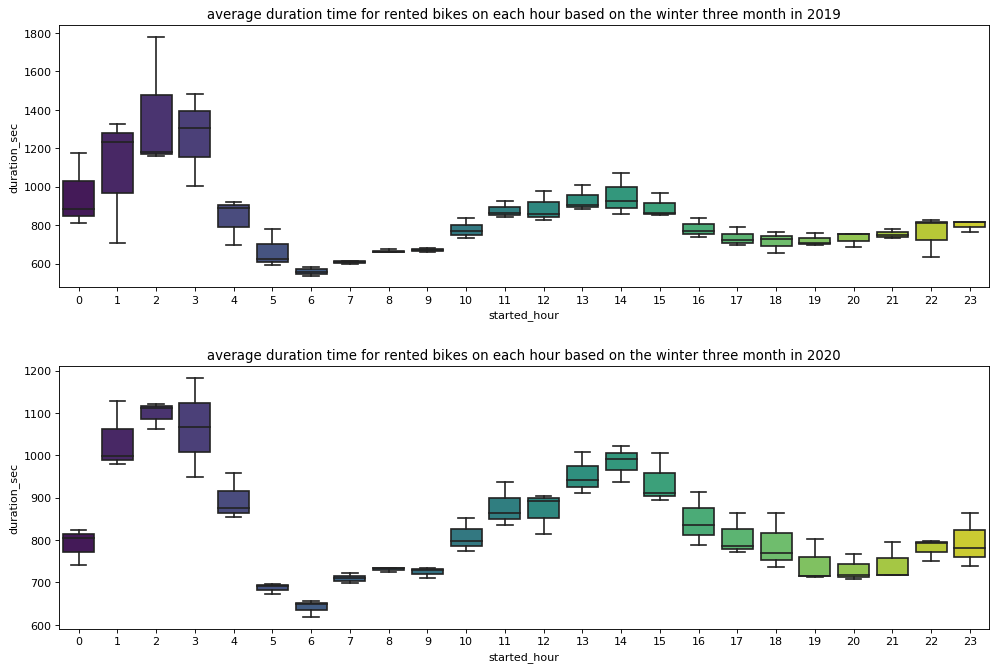

In [16]:

fig, ax = plt.subplots(figsize = (15,10), dpi = 80)
plt.subplot(2,1,1)
sns.boxplot(x = "started_hour", y = "duration_sec", data = df_2019.groupby(["started_hour", "month"], as_index = False).mean(), palette = "viridis")
plt.title('average duration time for rented bikes on each hour based on the winter three month in 2019')

plt.subplot(2,1,2)
sns.boxplot(x = "started_hour", y = "duration_sec", data = df_2020.groupby(["started_hour", "month"], as_index = False).mean(), palette = "viridis")
plt.title('average duration time for rented bikes on each hour based on the winter three month in 2020')
plt.subplots_adjust(hspace=0.3);

## In each day of the week and in each month, How many bikes have been rented?
- As we expected, popularity of rented bikes during the week was higher in 2019 than the weekends for Subscribers, but there was no difference in diversity of customers throughout the week.
- in 2020, subscribers in January and February followed a similar pattern, but in March 2020, total number of people who rented bikes on Sunday were more than any other days among Subscribers. what is interesting here is that customers also followed the same pattern. maybe there was an offer on Sundays in March 2020.
- what is more, total number of customers saw a sudden rise in 2020, reaching to 20000 to 30000 rent per day

''

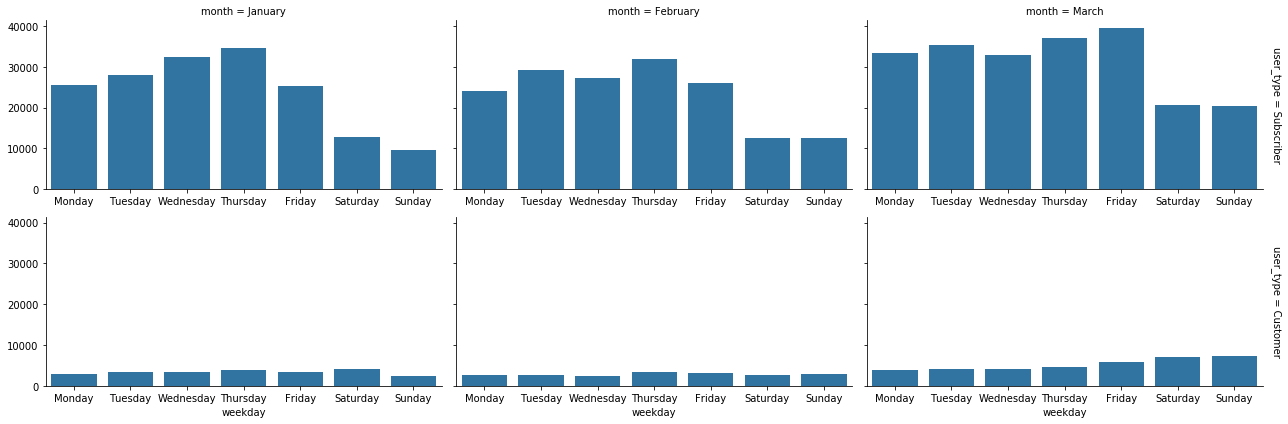

In [18]:
# Creating facetgrid for 2019
g = sns.FacetGrid(data=df_2019, col='month', row='user_type', row_order =  ['Subscriber','Customer'],
                  height=3, aspect=2, margin_titles=True, sharex=False)
# Displaying countplots
g.map(sns.countplot, 'weekday', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
;

''

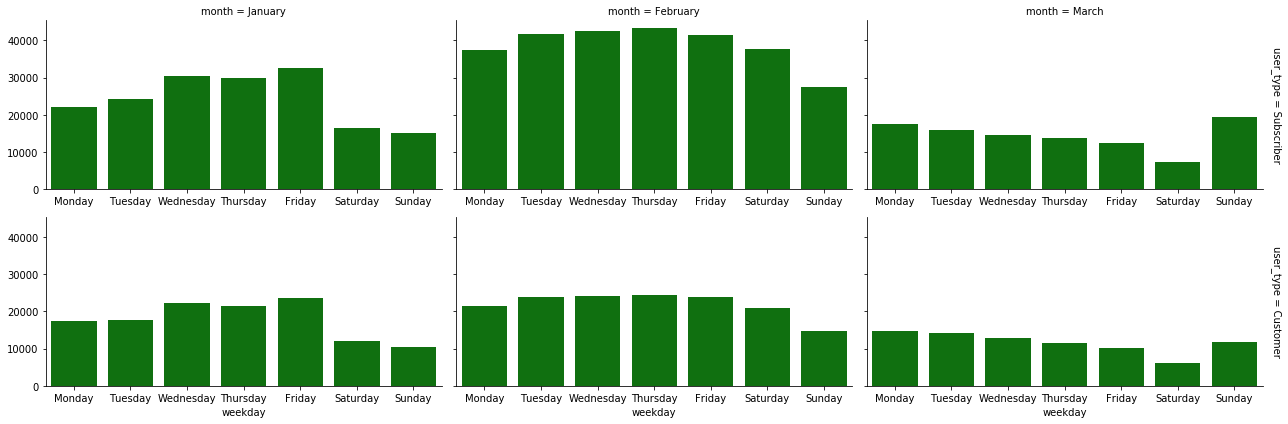

In [19]:
# Creating facetgrid for 2020
g = sns.FacetGrid(data=df_2020, col='month', row='user_type', row_order =  ['Subscriber','Customer'],
                  height=3, aspect=2, margin_titles=True, sharex=False)
# Displaying countplots
g.map(sns.countplot, 'weekday', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],color = 'g')
;


Use the following expression from the terminal or command line to run the presentation:
> `jupyter nbconvert BayWheels_Bike_Renting_Analysis_slides.ipynb --to slides --post serve --template output_toggle`

This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide.